<a href="https://colab.research.google.com/github/rohanblueboybaijal/pclub_selection/blob/master/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [158]:
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(X.shape)

(10, 1)


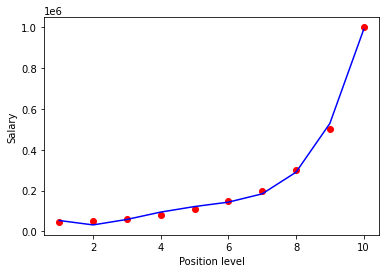

In [159]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial_regression():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial_regression()

In [0]:
def h(X, theta):
    return X@theta

In [0]:
#Just for the purpose of calculating loss per iteration and storing its values
def J(theta, X, y):
  return np.mean(np.square(h(X, theta) - y))

In [0]:
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

X = np.array(X)
y = np.array(y)
#print(y.shape)


In [163]:
X = np.hstack((np.ones((m, 1)), X))
print(X)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


In [164]:
X = np.hstack((X, (X[:,1]**2).reshape(m,1)))
X = np.hstack((X, (X[:,1]**3).reshape(m,1)))
X = np.hstack((X, (X[:,1]**4).reshape(m,1)))
print(X)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [165]:
# Normalization of features
# We don't normalize column with only ones
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
print(X)


[[ 1.         -1.5666989  -1.15669692 -0.92459328 -0.78691732]
 [ 1.         -1.21854359 -1.06416117 -0.90312676 -0.78225604]
 [ 1.         -0.87038828 -0.90993491 -0.84486052 -0.76205716]
 [ 1.         -0.52223297 -0.69401815 -0.73139468 -0.70767556]
 [ 1.         -0.17407766 -0.41641089 -0.54432937 -0.59300807]
 [ 1.          0.17407766 -0.07711313 -0.26526474 -0.38449347]
 [ 1.          0.52223297  0.32387514  0.1241991  -0.04111249]
 [ 1.          0.87038828  0.78655391  0.64246199  0.48561217]
 [ 1.          1.21854359  1.31092318  1.30792382  1.25161589]
 [ 1.          1.5666989   1.89698295  2.13898444  2.32029206]]


In [0]:
m = X.shape[0] #No. of training examples
n = X.shape[1] #No. of features

theta = np.random.random(n)
loss_history = []
alpha = 0.01


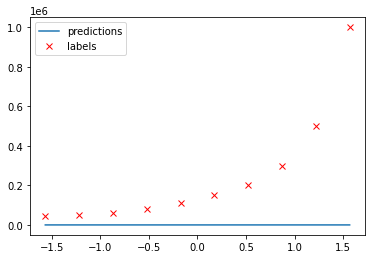

In [167]:
predictions = h(X, theta)
plt.plot(X[:, 1], predictions, label='predictions')
plt.plot(X[:, 1], y, 'rx', label='labels')
plt.legend()

In [0]:
loss = []
for _ in range(5000):
  theta = theta - alpha * (1/m) * (X.T @ ((X @ theta) - y))
  loss.append(J(theta, X, y))

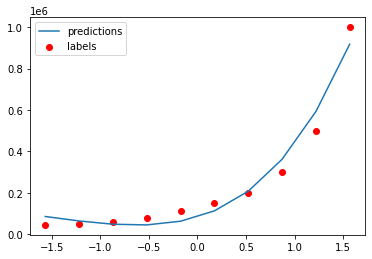

In [169]:
prediction = h(X, theta)
plt.plot(X[:,1], prediction,label='predictions')
plt.scatter(X[:,1],y, color='red', label='labels')
plt.legend()

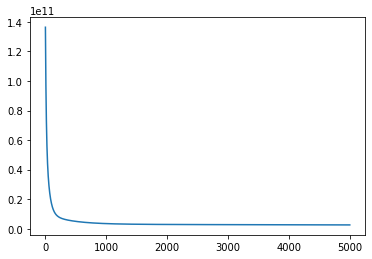

In [170]:
plt.plot(loss)